# California K-12 Public Schools
## Meeting the Standards Projection

   <img src='images/shutterstock_213333985.jpeg' width="700">
   
   **Credit:**  [shutterstock](https://www.shutterstock.com/image-photo/school-books-on-desk-education-concept-213333985)


In [83]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import pandas_profiling

warnings.filterwarnings("ignore")  # Suppress all warnings

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 
import scipy.stats as stats
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_context("poster")
sns.set(style='ticks')

# Modeling
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.linear_model import Lasso

In [84]:
# load file
language = pd.read_csv('data/df_language_with_dummies')

# copy original df
language_df = language.copy()

# Drop columns not useful for modeling
language_df = language_df.drop(['School Name', 'School Code', 'Zip Code', 'County Name', 'County Code',
       'Latitude', 'Longitude'], axis=1)

# Transform percentage to 0-1
language_df[['Fluent English', 'English Learner', 'Ever-Els', 'Migrant',
       'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']] = language_df[['Fluent English', 'English Learner', 'Ever-Els', 'Migrant',
       'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']].div(100)

# Dimensions of the dataset 
print(language_df.shape)

# Overview of the data check all features are numeric
#language_df.info()

(9646, 58)


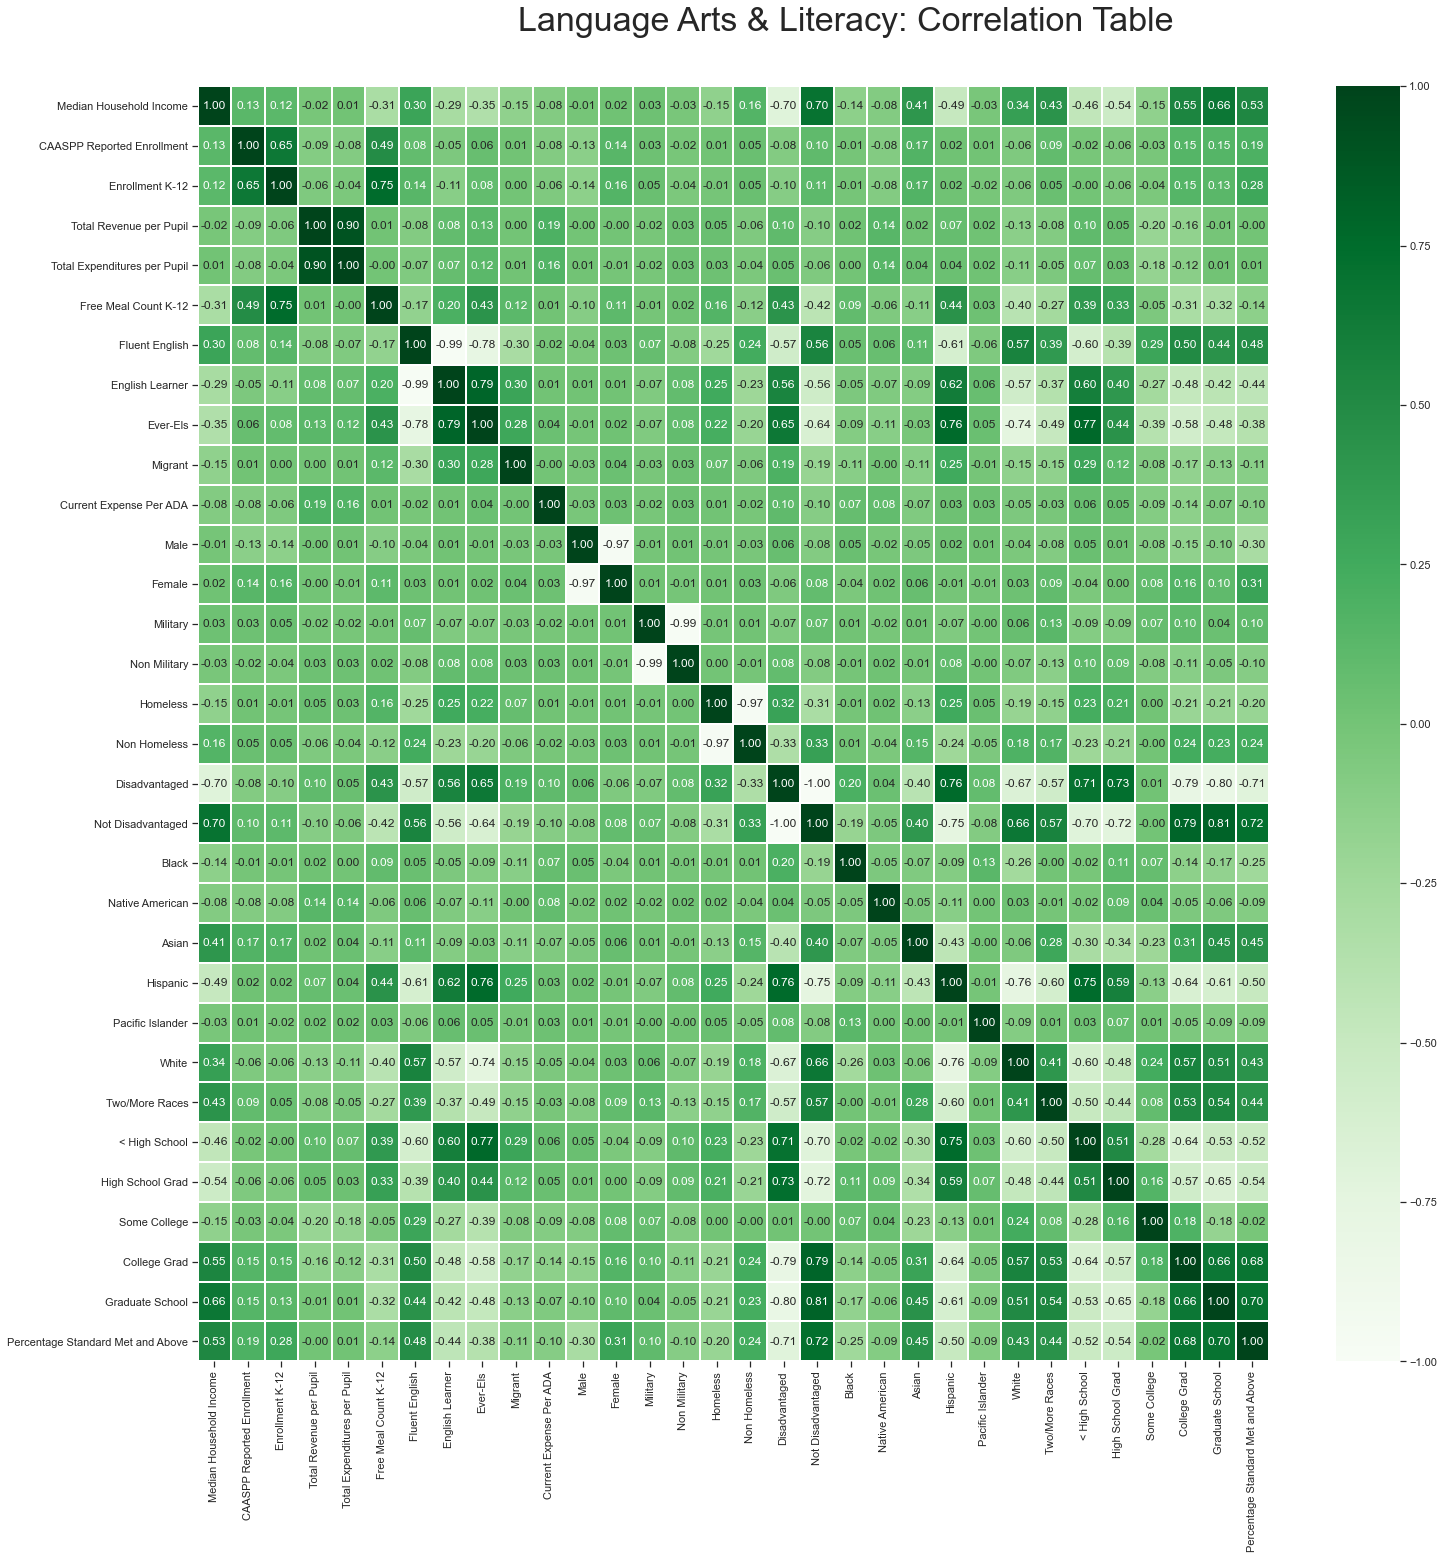

In [85]:
table = language_df[['Median Household Income', 'CAASPP Reported Enrollment','Enrollment K-12',
       'Total Revenue per Pupil','Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Fluent English','English Learner', 'Ever-Els', 'Migrant',            
       'Current Expense Per ADA', 'Male', 'Female','Military', 'Non Military','Homeless','Non Homeless',
       'Disadvantaged','Not Disadvantaged', 'Black','Native American','Asian','Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad', 'Some College','College Grad',
       'Graduate School','Percentage Standard Met and Above']]

# Run correlation on table constructed with count instead of percentage values
corrmat = table.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, cmap="Greens", ax=ax, fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Language Arts & Literacy: Correlation Table', fontsize=34)

In [86]:
print(language_df['Percentage Standard Met and Above'].min())
print(language_df['Percentage Standard Met and Above'].max())

0.0
1.0


Text(0, 0.5, 'Number of schools')

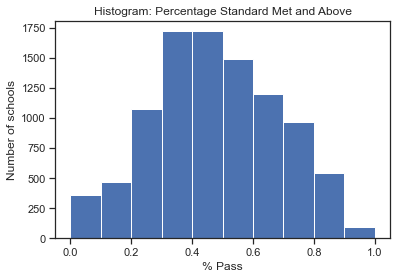

In [87]:
# distrubution of the dependent var
plt.hist(language_df['Percentage Standard Met and Above'])
plt.title("Histogram: Percentage Standard Met and Above")
plt.xlabel("% Pass")
plt.ylabel("Number of schools")

## Applying the Machine Learning models:
This is a regression problem, in supervised learning. Here we have used the following regression models:

- Linear Regression
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boost

### The following metrics are used ffor model performance:
   - MAE
   - MSE
   - RMSE
   - R_squared
   
Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train, validation) set. In order to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

#### Train/Test Split

In [91]:
# response variable
y = language_df['Percentage Standard Met and Above']

# All columns from data in the explanatory variables X minus dummy columns
X = language_df.drop(['Percentage Standard Met and Above', 
       'CAASPP Reported Enrollment-Dummy',
       'Enrollment K-12-Dummy','Fluent English-Dummy',
       'English Learner-Dummy',
       'Ever-Els-Dummy','Migrant-Dummy', 'Male-Dummy',
       'Female-Dummy', 'Military-Dummy',
       'Non Military-Dummy', 'Homeless-Dummy',
       'Non Homeless-Dummy', 'Disadvantaged-Dummy',
       'Not Disadvantaged-Dummy', 'Black-Dummy',
       'Native American-Dummy', 'Asian-Dummy',
       'Hispanic-Dummy',
       'Pacific Islander-Dummy', 'White-Dummy',
       'Two/More Races-Dummy', '< High School-Dummy',
       'High School Grad-Dummy',
       'Some College-Dummy', 'College Grad-Dummy',
       'Graduate School-Dummy'], axis=1)

# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape, 'y_test: ', y_test.shape)

X_train:  (7716, 31) y_train:  (7716,) X_test : (1930, 31) y_test:  (1930,)


In [93]:
X.columns

Index(['Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Fluent English', 'English Learner',
       'Ever-Els', 'Migrant', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School'],
      dtype='object')

## 1. LINEAR REGRESSION

These are baseline models using Sklearn and Statsmodel. The following models contain all variables - including highly correlated ones - the progression can be seem as the models are refined and other modeling techniques are used.


### 1. a. Sklearn

In [94]:
# Create linear model
rModel = linear_model.LinearRegression(normalize=True) # normalize=True parameter enables the handling of different scales

In [95]:
# Train model call .fit() method of rModel
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [96]:
# Predict on both x train and x test
y_tr_pred = rModel.predict(X_train)
y_te_pred = rModel.predict(X_test)

In [97]:
# Evaluate the model call .score() on rModel with parameters X_train, y_train
print(rModel.score(X_train, y_train).round(4), rModel.score(X_test, y_test).round(4))

0.7272 0.7438


In [98]:
# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0818, 0.0798)
Mean Squared Error - train, test: (0.0117, 0.0107)
Root Mean Squared Error - train, test: (0.1082, 0.1033)
R-square - train, test: (0.7272, 0.7438)


Text(0, 0.5, 'Predicted values')

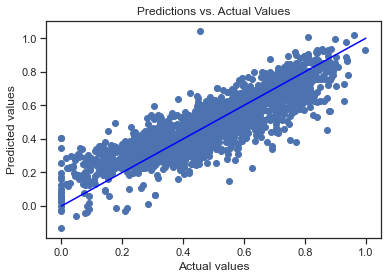

In [101]:
# Plot the predictions against the actual result
plt.scatter(y_test, y_te_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='blue')

# Label 
plt.title("Predictions vs. Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

### 1. b. Statsmodel
- Ordinary Least Square Method (OLS)

In [104]:
# Create constants for X train and test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [231]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)

# Fit the model
rModel2_results = rModel2.fit()

In [232]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Standard Met and Above   R-squared:                       0.740
Model:                                           OLS   Adj. R-squared:                  0.738
Method:                                Least Squares   F-statistic:                     395.8
Date:                               Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                                       19:29:07   Log-Likelihood:                 6394.1
No. Observations:                               7716   AIC:                        -1.268e+04
Df Residuals:                                   7660   BIC:                        -1.229e+04
Df Model:                                         55                                         
Covariance Type:                           nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Median Household Income           -1.96e-07   7.52e-08     -2.604      0.009   -3.43e-07   -4.85e-08
CAASPP Reported Enrollment       -4.946e-05   6.88e-06     -7.187      0.000    -6.3e-05    -3.6e-05
CAASPP Reported Enrollment-Dummy    -0.2761      0.112     -2.454      0.014      -0.497      -0.056
Enrollment K-12                   5.054e-05   5.82e-06      8.691      0.000    3.91e-05    6.19e-05
Enrollment K-12-Dummy                0.0903      0.017      5.227      0.000       0.056       0.124
Total Revenue per Pupil             5.4e-06   8.51e-07      6.348      0.000    3.73e-06    7.07e-06
Total Expenditures per Pupil     -8.443e-07   8.13e-07     -1.038      0.299   -2.44e-06    7.49e-07
Free Meal Count K-12             -1.771e-05    1.1e-05     -1.610      0.108   -3.93e-05    3.86e-06
Current Expense Per ADA          -7.187e-07   2.65e-07     -2.708      0.007   -1.24e-06   -1.98e-07
Fluent English                       0.7708      0.076     10.204      0.000       0.623       0.919
Fluent English-Dummy                -0.0978      0.042     -2.344      0.019      -0.180      -0.016
English Learner                      0.4089      0.076      5.409      0.000       0.261       0.557
English Learner-Dummy               -0.0162      0.006     -2.571      0.010      -0.028      -0.004
Ever-Els                             0.1617      0.015     11.005      0.000       0.133       0.190
Ever-Els-Dummy                       0.0145      0.009      1.696      0.090      -0.002       0.031
Migrant                              0.4560      0.065      7.000      0.000       0.328       0.584
Migrant-Dummy                       -0.0237      0.005     -4.704      0.000      -0.034      -0.014
Male                                -0.2895      0.116     -2.488      0.013      -0.518      -0.061
Male-Dummy                           0.2447      0.040      6.103      0.000       0.166       0.323
Female                               0.2302      0.117      1.963      0.050       0.000       0.460
Female-Dummy                        -0.0455      0.025     -1.834      0.067      -0.094       0.003
Military                            -0.2190      0.168     -1.304      0.192      -0.548       0.110
Military-Dummy                       0.0156      0.004      3.645      0.000       0.007       0.024
Non Military                        -0.3110      0.168     -1.857      0.063      -0.639       0.017
Non Military-Dummy                  -0.2761      0.112     -2.454      0.014      -0.497      -0.056
Homeless                             0.6182      0.090      6.837      0.000       0.441  

In [233]:
# Make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_te_pred = rModel2_results.predict(X_test)
y_tr_pred = rModel2_results.predict(X_train)

In [234]:
# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0804, 0.0785)
Mean Squared Error - train, test: (0.0112, 0.0103)
Root Mean Squared Error - train, test: (0.1056, 0.1015)
R-square - train, test: (0.7397, 0.7523)


Text(0, 0.5, 'Predicted values')

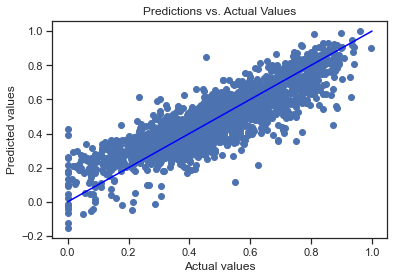

In [235]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_te_pred)

# Add a line for perfect correlation. Can you see what this line is doing? 
plt.plot([x for x in range(0,2)],[x for x in range(0,2)], color='blue')

# Label 
plt.title("Predictions vs. Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

There are signs of multicollinearity in the analysis. For instance, the variable disadvantaged is highly correlated with the response variable but appears with not a significant coefficient in the regression analysis. Median houselhold income also has a positive correlation with the response variable and the coefficient sign is not logical. There are also variables with high pairwise relationship. In the following examples, the modeling addresses these issues.

-------------------

## 1. c. Detecting Multicollinearity with VIF


**The Variance Inflation Factor (VIF)**

The Variance Inflation Factor (VIF) measures the impact of collinearity among the variables in a regression model. The Variance Inflation Factor (VIF) is 1/Tolerance, it is always greater than or equal to 1. There is no formal VIF value for determining presence of multicollinearity. Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = language_df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(language_df.values, i) for i in range(len(language_df.columns))]
  
print(vif_data)

                              feature         VIF
0             Median Household Income    2.450696
1          CAASPP Reported Enrollment    2.458694
2    CAASPP Reported Enrollment-Dummy    0.000000
3                     Enrollment K-12    6.619322
4               Enrollment K-12-Dummy    1.264293
5             Total Revenue per Pupil    5.438119
6        Total Expenditures per Pupil    5.279518
7                Free Meal Count K-12    7.929771
8             Current Expense Per ADA    1.097731
9                      Fluent English   80.495211
10               Fluent English-Dummy    1.174565
11                    English Learner   83.382240
12              English Learner-Dummy    2.818908
13                           Ever-Els    8.881374
14                     Ever-Els-Dummy    2.270255
15                            Migrant    2.009666
16                      Migrant-Dummy    2.154926
17                               Male   40.826922
18                         Male-Dummy    1.374927


Since this is a project in the social sciences which deals with data that tends to correlate with one another naturally by environment, the threshold chosen for VIF is 10. Using the information provided by the pairwise correlation table, variables showing high pairwise relationship and high VIF are dropped from the model. In conclusion, VIF is very useful in highlighting multicollinearity, but it does not necessarily answer the question of which collinear feature shoud be dropped.

In [163]:
# Dropping highly correlated vars awith high vif score
X_vif = language_df.drop(['Fluent English', 'Fluent English-Dummy', 
                          'Female', 'Non Homeless', 'Non Homeless-Dummy', 'Enrollment K-12', 'Enrollment K-12-Dummy',
                          'Homeless', 'Non Homeless-Dummy','Not Disadvantaged', 'Not Disadvantaged-Dummy', 
                          'Non Military', 'Non Military-Dummy', 'White'], axis=1)

In [164]:
# Revisiting scores
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
  
print(vif_data)

                              feature          VIF
0             Median Household Income     2.333888
1          CAASPP Reported Enrollment     2.310606
2    CAASPP Reported Enrollment-Dummy  1145.142542
3             Total Revenue per Pupil     5.418828
4        Total Expenditures per Pupil     5.259617
5                Free Meal Count K-12     2.413810
6             Current Expense Per ADA     1.091901
7                     English Learner     3.864173
8               English Learner-Dummy     2.263475
9                            Ever-Els     8.708786
10                     Ever-Els-Dummy     2.217512
11                            Migrant     2.003378
12                      Migrant-Dummy     2.152645
13                               Male     1.701389
14                         Male-Dummy     1.180025
15                       Female-Dummy     1.460845
16                           Military     1.341566
17                     Military-Dummy     1.469325
18                     Homeless

### 1. d. Re-run regression model adjusted for VIF scores

In [236]:
# Dropping highly correlated vars awith high vif score
X_vif = language_df.drop(['Fluent English', 'Fluent English-Dummy', 
                          'Female', 'Non Homeless', 'Non Homeless-Dummy', 'Enrollment K-12', 'Enrollment K-12-Dummy',
                          'Homeless', 'Non Homeless-Dummy','Not Disadvantaged', 'Not Disadvantaged-Dummy', 
                          'Non Military', 'Non Military-Dummy', 'White', 'Percentage Standard Met and Above'], axis=1)


# Split data into test and training
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_vif, y, test_size = 0.20, random_state = 42)

# Train model call .fit() method of rModel
rModel.fit(X_train_vif, y_train_vif)

# Predict on both x train and x test
y_tr_pred_vif = rModel.predict(X_train_vif)
y_te_pred_vif = rModel.predict(X_test_vif)

# Evaluate the model call .score() on rModel with parameters X_train, y_train
# MAE
median_mae = mean_absolute_error(y_train_vif, y_tr_pred_vif).round(4), mean_absolute_error(y_test_vif, y_te_pred_vif).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train_vif, y_tr_pred_vif).round(4), mean_squared_error(y_test_vif, y_te_pred_vif).round(4)
# RMSE
median_rmse = mean_squared_error(y_train_vif, y_tr_pred_vif, squared=False).round(4), mean_squared_error(y_test_vif, y_te_pred_vif, squared=False).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))
print(rModel.score(X_train_vif, y_train_vif).round(4), rModel.score(X_test_vif, y_test_vif).round(4))

Mean Absolute Error - train, test: (0.0827, 0.0799)
Mean Squared Error - train, test: (0.0118, 0.0109)
Root Mean Squared Error - train, test: (0.1088, 0.1043)
R-square - train, test: (0.7397, 0.7523)
0.7238 0.7385


**Observation**: The evaluation metrics show that there is basically no improvement in the regression model. Let's try different models that are better "equipped" to handle highly correlated data.

-------

# 2. RANDOM FOREST

In [202]:
# response variable
y = language_df['Percentage Standard Met and Above']

# All columns from data in the explanatory variables X minus dummy columns
X = language_df.drop(['Percentage Standard Met and Above'], axis=1)

# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [204]:
# Import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 
rf = RandomForestRegressor(random_state = SEED)

# Print out hyperparameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [212]:
# Define hyperparameters
params_rf = {
        'n_estimators':[100, 350, 500],
        'max_features':['log2', 'auto', 'sqrt'],
        'min_samples_leaf':[2, 10, 30]}

# Instantiate a k-fold CV grid search object
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# Fit train model
grid_rf.fit(X_train, y_train)
    
# Extract best hyperparameters
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best model
best_model = grid_rf.best_estimator_
    

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best hyerparameters:
 {'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 500}


In [213]:
# Make predictions
y_te_pred = best_model.predict(X_test)
y_tr_pred = best_model.predict(X_train)

# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0302, 0.0701)
Mean Squared Error - train, test: (0.0018, 0.0085)
Root Mean Squared Error - train, test: (0.0423, 0.092)
R-square - train, test: (0.9582, 0.7965)


### 2. a. Random Forest Pipeline

In [214]:
# RandomForestRegressor() with a random state of 42
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=SEED)
)

# 3-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)

# R2
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.76587856, 0.76090897, 0.75495659])

In [215]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.7605813738516547, 0.004464888731401174)

In [216]:
# TUNING PARAMETERS
n_est = [100, 200, 300]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None]
}
grid_params

{'randomforestregressor__n_estimators': [100, 200, 300],
 'standardscaler': [StandardScaler(), None]}

In [218]:
# Call GridSearchCV with the random forest pipeline
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

In [219]:
# Fit train model
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=1))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [100, 200, 300],
                         'standardscaler': [StandardScaler(), None]})

In [220]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 300,
 'standardscaler': StandardScaler()}

In [224]:
# Make predictions
y_te_pred = rf_grid_cv.predict(X_test)
y_tr_pred = rf_grid_cv.predict(X_train)

# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0274, 0.07)
Mean Squared Error - train, test: (0.0014, 0.0084)
Root Mean Squared Error - train, test: (0.0367, 0.0917)
R-square - train, test: (0.9685, 0.7981)


**Observation:** Random Forest performs better than Linear regression as expected, but not that much better. There might be overfitting taking place in the training data. Further hyperparameter tuning may improve that.

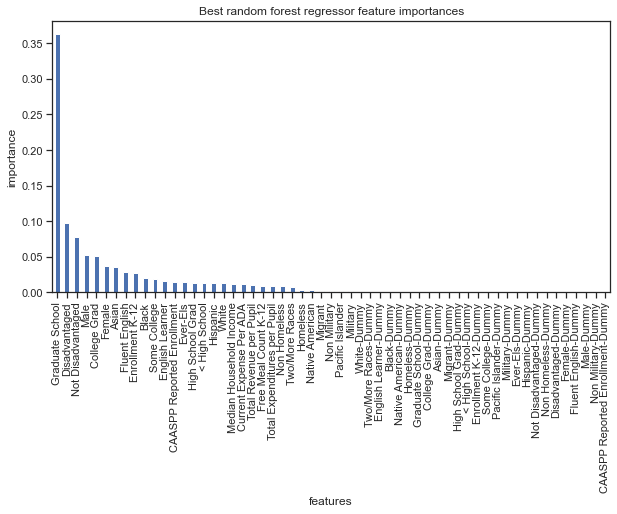

In [221]:
# training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

**Observation:** As seen in the EDA, the most important features to predict percentage of students passing test standards are graduate and college school level of education of parents, socioeconomic status, sex (schools with higher number of girls tend to outperform, while schools with higher number of boys tend to underperform), if they come from Asian background (Asian is highly correlated with having higher level of education), and English fluency.

-----------

# 3. PCA

In [54]:
# Define the PCA object  
pca = PCA()    
X_reduced = pca.fit_transform(scale(X))

# Create linear regression object   
regr = linear_model.LinearRegression()

Text(0.5, 1.0, '% of students passing the standards')

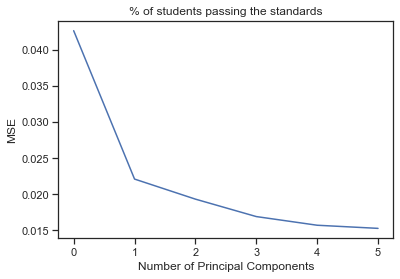

In [55]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('% of students passing the standards')

In [56]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([19.11, 29.57, 34.95, 39.72, 43.86, 47.95, 51.68, 55.13, 58.17,
       60.99, 63.51, 65.64, 67.76, 69.7 , 71.55, 73.29, 74.96, 76.56,
       78.05, 79.43, 80.75, 82.03, 83.27, 84.4 , 85.49, 86.54, 87.53,
       88.48, 89.39, 90.27, 91.12, 91.96, 92.77, 93.57, 94.27, 94.96,
       95.57, 96.17, 96.71, 97.22, 97.66, 98.08, 98.47, 98.84, 99.16,
       99.39, 99.57, 99.73, 99.85, 99.89, 99.92, 99.94, 99.96, 99.97,
       99.97, 99.97, 99.97])

In [57]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

0.14618109244334773

In [67]:
r2_score(y_test, pred).round(4)

0.4866

In [58]:
# # RMSE
# median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)

# #r2
# median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

In [68]:
# print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
# print ('R-square - train, test: ' + str(median_r2))

# 4. LASSO

In [61]:
from numpy import mean
from numpy import std
from numpy import absolute

# define model
model = Lasso(alpha=0)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=4)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.081 (0.002)


In [62]:
# fit model
model.fit(X, y)

Lasso(alpha=0)

In [63]:
# Make predictions
y_te_pred = model.predict(X_test)
y_tr_pred = model.predict(X_train)

In [64]:
# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)

# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)

# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)

#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

In [65]:
print('Mean Absolute Error - train, test: ' + str(median_mae))
print('Mean Squared Error - train, test: ' + str(median_mse))
print('Root Mean Squared Error - train, test: ' + str(median_rmse))
print('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0804, 0.0778)
Mean Squared Error - train, test: (0.0112, 0.0101)
Root Mean Squared Error - train, test: (0.1058, 0.1004)
R-square - train, test: (0.7392, 0.7579)


In [66]:
from numpy import arange

# define model
model = Lasso()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=4)

# perform the search
results = search.fit(X, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.081
Config: {'alpha': 0.0}


# 5. DECISION TREE

In [184]:
# response variable
y = language_df['Percentage Standard Met and Above']

# All columns from data in the explanatory variables X minus dummy columns
X = language_df.drop(['Percentage Standard Met and Above'], axis=1)

# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [201]:
from sklearn.tree import DecisionTreeRegressor
from random import randint
from sklearn.model_selection import RandomizedSearchCV

# Inspect hyperparameters; choose the ones to tune

# Instantiate
dt = DecisionTreeRegressor()

# Define the grid hyperparameters
param_dist = {'max_depth': [20, 30, 40],
              'min_samples_leaf': [0.01, 0.04, 0.05]}

# Instantiate a k-fold CV grid search object
dt_cv = GridSearchCV(dt, param_dist, cv=3)

# Fit model - train
dt_cv.fit(X_train, y_train)

# Predict
y_pred = dt_cv.predict(X_test)

# Extract best hyperparameters
# Extract best cv score
print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))
print("Best score is {}".format(dt_cv.best_score_))

# Extract best model

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
print ('Mean Squared Error - test: ' + str(mse_dt))
print ('Root Mean Squared Error - test: ' + str(rmse_dt))

Tuned Decision Tree Parameters: {'max_depth': 40, 'min_samples_leaf': 0.01}
Best score is 0.6556228504715867
Mean Squared Error - test: 0.0124909375241763
Root Mean Squared Error - test: 0.11176286290255945


## 6. LOGISTIC REGRESSION

In [ ]:
# from sklearn import preprocessing
# from sklearn import utils

# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(----)



In [ ]:
# C_param_range = [0.001,0.01,0.1,1,10,100]

# table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
# table['C_parameter'] = C_param_range


# j = 0
# for i in C_param_range:
    
#     # Apply logistic regression model to training data
#     Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
#     Logreg.fit(X_train,y_train)
    
#     # Predict using model
#     y_pred_lr = Logreg.predict(X_test)
    
#     # Saving accuracy score in table
#     table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
#     j += 1
    
# table


In [ ]:
# cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
# cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
# print(cv_scores_test)
# cv_scores_lr_test= cv_scores_test.mean()
# cv_scores_lr_train= cv_scores_train.mean()
# cv_scores_std_test_lr= cv_scores_test.std()
# print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
# print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
# print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

# 7. GRADIENT BOOSTING

In [225]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [226]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = mean_squared_error(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.090


In [227]:
# Make predictions
y_te_pred = gb.predict(X_test)
y_tr_pred = gb.predict(X_train)

#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

In [228]:
print(median_r2)

(0.8766, 0.8061)
